In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the DrugBank data
drugbank_ddi = pd.read_csv('resources/drugbank_ddi.tab', sep='\t')

# DDIs Preparation

In [4]:
# Rule-based filtering

# Absorption
absorption_filter = drugbank_ddi['Map'].str.contains('absorption')
absorption_ddi = drugbank_ddi[absorption_filter]

# Metabolism
metabolism_filter = drugbank_ddi['Map'].str.contains('metabo')
metabolism_ddi = drugbank_ddi[metabolism_filter]

# Excretion
excretion_filter = drugbank_ddi['Map'].str.contains('excretion')
excretion_ddi = drugbank_ddi[excretion_filter]


In [3]:
absorption_ddi.groupby('Map').size()

Map
#Drug1 can cause a decrease in the absorption of #Drug2 resulting in a reduced serum concentration and potentially a decrease in efficacy.                930
#Drug1 can cause an increase in the absorption of #Drug2 resulting in an increased serum concentration and potentially a worsening of adverse effects.     82
The absorption of #Drug2 can be decreased when combined with #Drug1.                                                                                       45
dtype: int64

In [4]:
metabolism_ddi.groupby('Map').size()

Map
The metabolism of #Drug2 can be decreased when combined with #Drug1.                                                                                          34360
The metabolism of #Drug2 can be increased when combined with #Drug1.                                                                                           5011
The serum concentration of the active metabolites of #Drug2 can be increased when #Drug2 is used in combination with #Drug1.                                    538
The serum concentration of the active metabolites of #Drug2 can be reduced when #Drug2 is used in combination with #Drug1 resulting in a loss in efficacy.      312
dtype: int64

In [5]:
excretion_ddi.groupby('Map').size()

Map
#Drug1 may decrease the excretion rate of #Drug2 which could result in a higher serum level.                                           1825
#Drug1 may increase the excretion rate of #Drug2 which could result in a lower serum level and potentially a reduction in efficacy.      32
dtype: int64

In [47]:
pharmacokinetics_ddi = pd.concat([absorption_ddi, metabolism_ddi, excretion_ddi])
pharmacokinetics_ddi = pharmacokinetics_ddi.drop_duplicates()
pharmacokinetics_ddi["ID1"] = "Compound::" + pharmacokinetics_ddi["ID1"]
pharmacokinetics_ddi["ID2"] = "Compound::" + pharmacokinetics_ddi["ID2"]
pharmacokinetics_ddi = pharmacokinetics_ddi[["ID1", "ID2", "Map"]]
pharmacokinetics_ddi

,ID1,ID2,Map
12885,Compound::DB01188,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12886,Compound::DB01141,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12887,Compound::DB00525,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12888,Compound::DB00520,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12889,Compound::DB02513,Compound::DB00396,The absorption of #Drug2 can be decreased when...
...,...,...,...
154786,Compound::DB00452,Compound::DB00744,#Drug1 may decrease the excretion rate of #Dru...
154787,Compound::DB00997,Compound::DB00812,#Drug1 may decrease the excretion rate of #Dru...
154788,Compound::DB00997,Compound::DB00814,#Drug1 may decrease the excretion rate of #Dru...
154789,Compound::DB01177,Compound::DB09084,#Drug1 may decrease the excretion rate of #Dru...


In [5]:
hetionet_entities = pd.read_csv("resources/hetionet_nodes.tsv", delimiter="\t")
hetionet_comounds = hetionet_entities[hetionet_entities['kind'] == 'Compound']

In [6]:
pharmacokinetics_ddi_for_hetionet = pharmacokinetics_ddi[pharmacokinetics_ddi["ID1"].isin(hetionet_entities["id"]) 
                                                         & pharmacokinetics_ddi["ID2"].isin(hetionet_entities["id"])]
pharmacokinetics_ddi_for_hetionet

,ID1,ID2,Map
12885,Compound::DB01188,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12886,Compound::DB01141,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12887,Compound::DB00525,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12888,Compound::DB00520,Compound::DB00396,The absorption of #Drug2 can be decreased when...
12892,Compound::DB08943,Compound::DB00396,The absorption of #Drug2 can be decreased when...
...,...,...,...
154784,Compound::DB06696,Compound::DB00500,#Drug1 may decrease the excretion rate of #Dru...
154786,Compound::DB00452,Compound::DB00744,#Drug1 may decrease the excretion rate of #Dru...
154787,Compound::DB00997,Compound::DB00812,#Drug1 may decrease the excretion rate of #Dru...
154788,Compound::DB00997,Compound::DB00814,#Drug1 may decrease the excretion rate of #Dru...


In [7]:
with open("resources/pharmacokinetics_ddi.tsv", "w") as file:
    pharmacokinetics_ddi_for_hetionet.to_csv(file, sep="\t", index=False)

# DDIs Statistics

In [5]:
# Muted Dracula Theme Color Constants
BACKGROUND = "#1e1f29"
CURRENT_LINE = "#2a2b38"
SELECTION = "#2a2b38"
FOREGROUND = "#d7d7d7"
COMMENT = "#505c75"
CYAN = "#6bc2d9"
GREEN = "#42d66c"
ORANGE = "#e0a568"
PINK = "#d164a3"
PURPLE = "#9e7fc7"
RED = "#d05050"
YELLOW = "#dcd585"


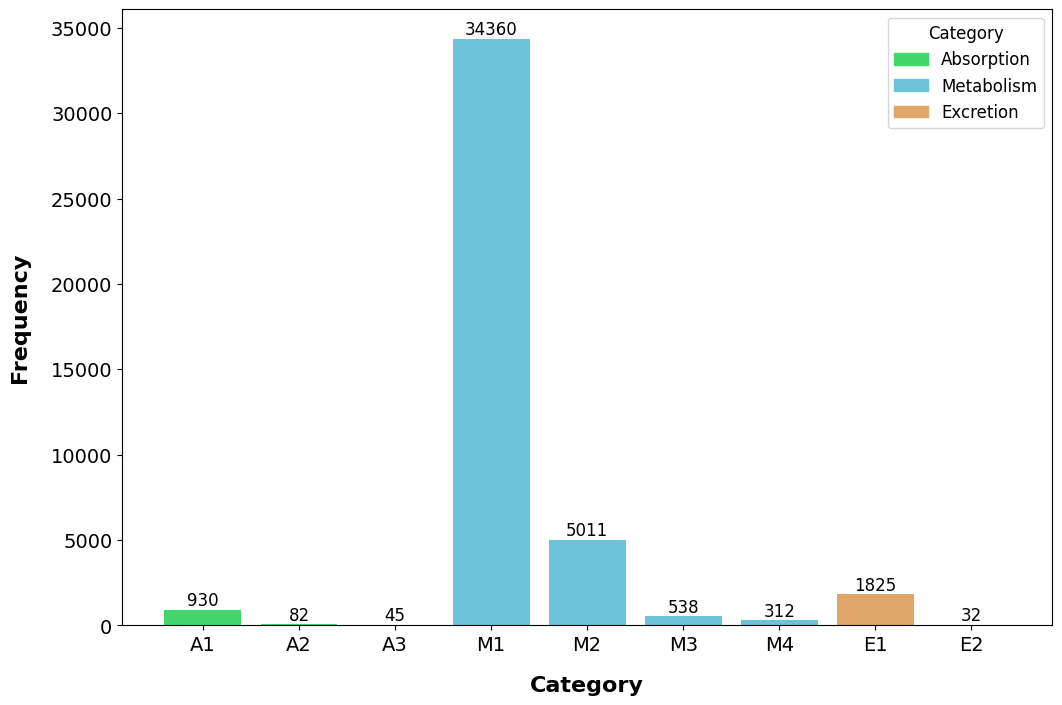

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data and assigning categories
absorption_ddi_group = absorption_ddi.groupby('Map').size().reset_index(name='Count')
absorption_ddi_group["ID"] = ["A1", "A2", "A3"]
absorption_ddi_group["Category"] = "Absorption"

metabolism_ddi_group = metabolism_ddi.groupby('Map').size().reset_index(name='Count')
metabolism_ddi_group["ID"] = ["M1", "M2", "M3", "M4"]
metabolism_ddi_group["Category"] = "Metabolism"

excretion_ddi_group = excretion_ddi.groupby('Map').size().reset_index(name='Count')
excretion_ddi_group["ID"] = ["E1", "E2"]
excretion_ddi_group["Category"] = "Excretion"

# Combine all groups
pharmacokinetics_ddi_group = pd.concat([absorption_ddi_group, metabolism_ddi_group, excretion_ddi_group])

# Create a color map
category_colors = {
    "Absorption": GREEN,
    "Metabolism": CYAN,
    "Excretion": ORANGE
}
colors = pharmacokinetics_ddi_group["Category"].map(category_colors)

# Plotting a bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(pharmacokinetics_ddi_group["ID"], pharmacokinetics_ddi_group["Count"], color=colors)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f'{height:.0f}', ha='center', va='bottom', fontsize=12)

# Adding labels and title
plt.xlabel("Category", labelpad=15, fontsize=16, fontweight='bold')
plt.ylabel("Frequency", labelpad=15, fontsize=16, fontweight='bold')

# Adjusting the font size of the axis tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding a legend with increased font size for the title
handles = [
    plt.Rectangle((0, 0), 1, 1, color=category_colors["Absorption"], label="Absorption"),
    plt.Rectangle((0, 0), 1, 1, color=category_colors["Metabolism"], label="Metabolism"),
    plt.Rectangle((0, 0), 1, 1, color=category_colors["Excretion"], label="Excretion")
]
plt.legend(handles=handles, title="Category", loc="upper right", fontsize=12, title_fontsize=12)

# Show the plot
plt.show()
